# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [15]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [16]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [17]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
print(sfo_data.head())
print('len = ',len(sfo_data))

file_path2 = Path("Data/neighborhoods_coordinates.csv")
header_list = ["neighborhood", "Lat", "Lon"]
nb_coord_data = pd.read_csv(file_path2, index_col="neighborhood", names=header_list, skiprows=1)
#nb_coord_data.rename(index={"Neighborhood": "neighborhood"}, inplace=True)
#sfo_data = pd.read_csv(file_path2, index_col="year")
print(nb_coord_data.head())
print('len = ',len(nb_coord_data))

sfo_housing_costs = sfo_data[['sale_price_sqr_foot', 'gross_rent']]
sfo_housing_costs_mean = sfo_housing_costs.groupby('year')[['sale_price_sqr_foot', 'gross_rent']].mean()


          neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239
len =  397
                       Lat         Lon
neighborhood                          
Alamo Square     37.791012 -122.402100
Anza Vista       37.779598 -122.443451
Bayview          37.734670 -122.401060
Bayview Heights  37.728740 -122.410980
Bernal Heights   37.728630 -122.443050
len =  73


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [18]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    sfo_housing_units_mean = sfo_data.groupby('year')['housing_units'].mean()
    mean_plot = sfo_housing_units_mean.hvplot.bar(ylim=(365000,387500)).opts(yformatter="%.0f", title='SFO Housing Units Mean')
    return mean_plot

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    sfo_housing_rent_mean_plot = sfo_housing_costs_mean['gross_rent'].plot.line(title='SFO Housing Average gross rent by Year -  Line plot', color = "g")
    return sfo_housing_rent_mean_plot

def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
#    sfo_housing_sale_mean_plot_hv = sfo_housing_costs_mean['sale_price_sqr_foot'].hvplot.line().opts( title='SFO Housing Average Price per sqr ft - HV Line plot', color = "m")

    sfo_housing_sale_mean_plot = sfo_housing_costs_mean['sale_price_sqr_foot'].plot.line( title='SFO Housing Average Price per sqr ft - Line plot', color = "m")
    return sfo_housing_sale_mean_plot
    
def nb_sale(neighborhood):
#    sfo_nb_housing_costs_mean = sfo_data.groupby(['neighborhood'])['sale_price_sqr_foot'].mean()
    sloc = sfo_nb_housing_costs_mean.loc[neighborhood]
#    sfo_nb_housing_sale_mean_plot_hv = sloc.hvplot.line(x='year', y='sale_price_sqr_foot').opts( title='SFO NB Housing Average Price per sqr ft - HV Line plot', color = "m")
    sfo_nb_housing_sale_mean_plot_hv = sloc.hvplot.line(x='year', y='sale_price_sqr_foot').opts( title='SFO NB Housing Average Price per sqr ft - HV Line plot', color = "m")

    #sfo_nb_housing_sale_mean_plot_hv = sfo_nb_housing_costs_mean.hvplot.line(x='year', y='sale_price_sqr_foot').opts( title='SFO NB Housing Average Price per sqr ft - HV Line plot', color = "m")

    return sfo_nb_housing_sale_mean_plot_hv
    
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    sfo_nb_housing_costs = sfo_data[['neighborhood', 'sale_price_sqr_foot']]
    sfo_nb_housing_costs_mean = sfo_nb_housing_costs.groupby(['neighborhood', 'year']).mean()
    #print(sfo_nb_housing_costs_mean.tail())
    sfo_nb_housing_costs_mean.reset_index()
    layout_sale = interact(nb_sale, neighborhood=sfo_data['neighborhood'])
    return pn.Column('**SFO Housing**', pn.Row(layout_sale[1], layout_sale[0]))
    
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    # YOUR CODE HERE!
    sfo_data_exp = sfo_data.groupby(['neighborhood']).mean()
    #print(sfo_data_exp)
    sfo_data_exp10 = sfo_data_exp.sort_values("sale_price_sqr_foot", ascending=False).head(10)
    top10_compare = sfo_data_exp
    sfo_data_exp_sale = sfo_data_exp10['sale_price_sqr_foot']
    sfo_data_exp_sale_plot = sfo_data_exp_sale.hvplot.bar(rot=90, height=400, title='Top 10 most expensive neighborhoods')
    return sfo_data_exp_sale_plot

def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # YOUR CODE HERE!

    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!



def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!



def neighborhood_map():
    """Neighborhood Map."""

    # YOUR CODE HERE!
    sfo_data_exp = sfo_data.groupby(['neighborhood']).mean()
    combined_df = pd.concat([sfo_data_exp, nb_coord_data], axis="columns", join="inner")
    #combined_df.head()
    combined_df.reset_index(inplace=True)
    map_plot = px.scatter_mapbox(
        combined_df,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        zoom=10,
        text='neighborhood'
    )
    #pane = pn.pane.Plotly(plot)
    #pane
    return map_plot


def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

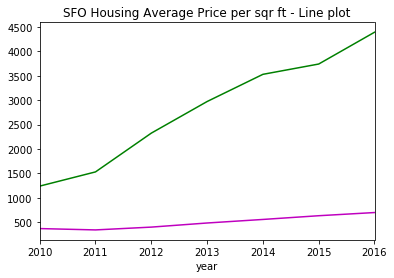

In [31]:
# Create a Title for the Dashboard
# YOUR CODE HERE!


# Create a tab layout for the dashboard
# YOUR CODE HERE!
map_plot_welcome = pn.Row(neighborhood_map())

row_of_yearly = pn.Column(
    "## Yearly SFO analysis", 
    housing_units_per_year(), 
    average_gross_rent(), 
    average_sales_price()
)
#row_of_bar = pn.Row(num_foreclosures_plot)
#row_of_bar.append(num_sales_plot)

sfo_analysis_dashboard = pn.Tabs(
    ("Welcome", map_plot_welcome),
    ("Yearly Market Analysis", row_of_yearly)
#    ("Neighborhood Analysis", row_of_parallel),
#    ("Parallel plots Analysis", row_of_parallel),
#    ("Sunburst plot Analysis", row_of_parallel)
)



# Create the dashboard
# YOUR CODE HERE!
# Create tabs




## Serve the Panel Dashboard

In [30]:
# Serve the# dashboard
# YOUR CODE HERE!
sfo_analysis_dashboard.servable()

Tabs
    [0] Row
        [0] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] Str(AxesSubplot)
        [3] Str(AxesSubplot)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [24]:
#housing_units_per_year()

:Bars   [year]   (housing_units)

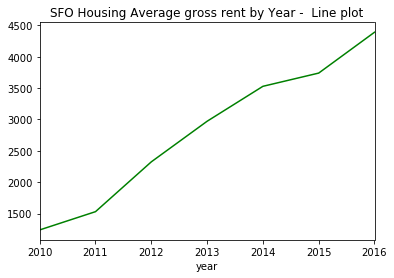

In [27]:
average_gross_rent()

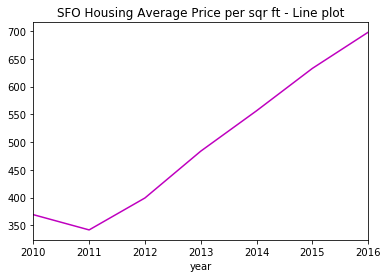

In [28]:
average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()